
### Multiple Linear Regression

In [27]:
from warnings import filterwarnings
filterwarnings("ignore")

#### Step 1 - Read dataset

In [28]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### PROFIT ~ RND, ADMIN, MKT
#### PROFIT_pred = B0 + B1xRND + B2xADMIN, B3xMKT
##### Step 2: Perform basic data quality checks

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [30]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)


#### Step 3 - Seperate X(RND, ADMIN, MKT) and Y(PROFIT)

In [32]:
X = df[["RND", "ADMIN", "MKT"]]
Y = df[["PROFIT"]]


In [33]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [34]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


#### Step 4 - Model building

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [37]:
model.intercept_

array([50122.19298987])

In [38]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [39]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [40]:
coefs = pd.Series(model.coef_.flatten(), index=X.columns)
coefs

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

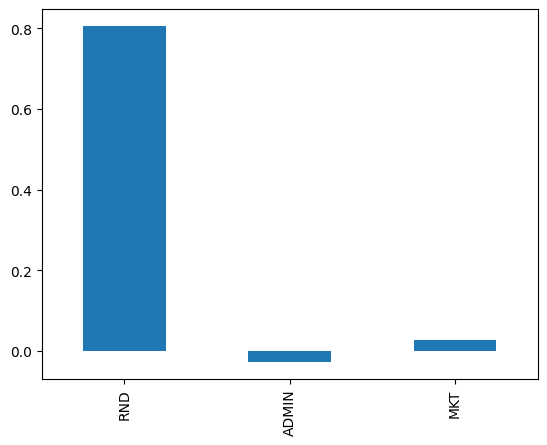

In [41]:
coefs.plot(kind="bar")


#### PROFIT = 50122.19 + 0.8057xRND -0.0268xADMIN + 0.0272xMKT
#### Follwing conclusions can be drawn
##### IF RND increases by 1000 , Profit will increase by 805.7
##### IF ADMIN increase by 1000 , Profit will decrease by 26.8
##### IF MKT increases by 1000, Profit will increase by 27.2

#### Prediction on X

In [42]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [43]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


#### Setp 5 - Evaluate the model

In [44]:

from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [45]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")

In [46]:

evaluate_model(model, X, Y)

MSE : 78417126.02
RMSE : 8855.34
MAE : 6471.45
MAPE : 0.1060
R2 Score : 0.9507



#### Step 6 - Out of sample prediction

In [47]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [48]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [49]:
rnd = 1_00_000
admin = 30_000
mkt = 1_20_000
xnew = [[rnd, admin, mkt]]
model.predict(xnew)

array([[133156.5867057]])

#### For startups More budget should be allocated to RND for earning more profi

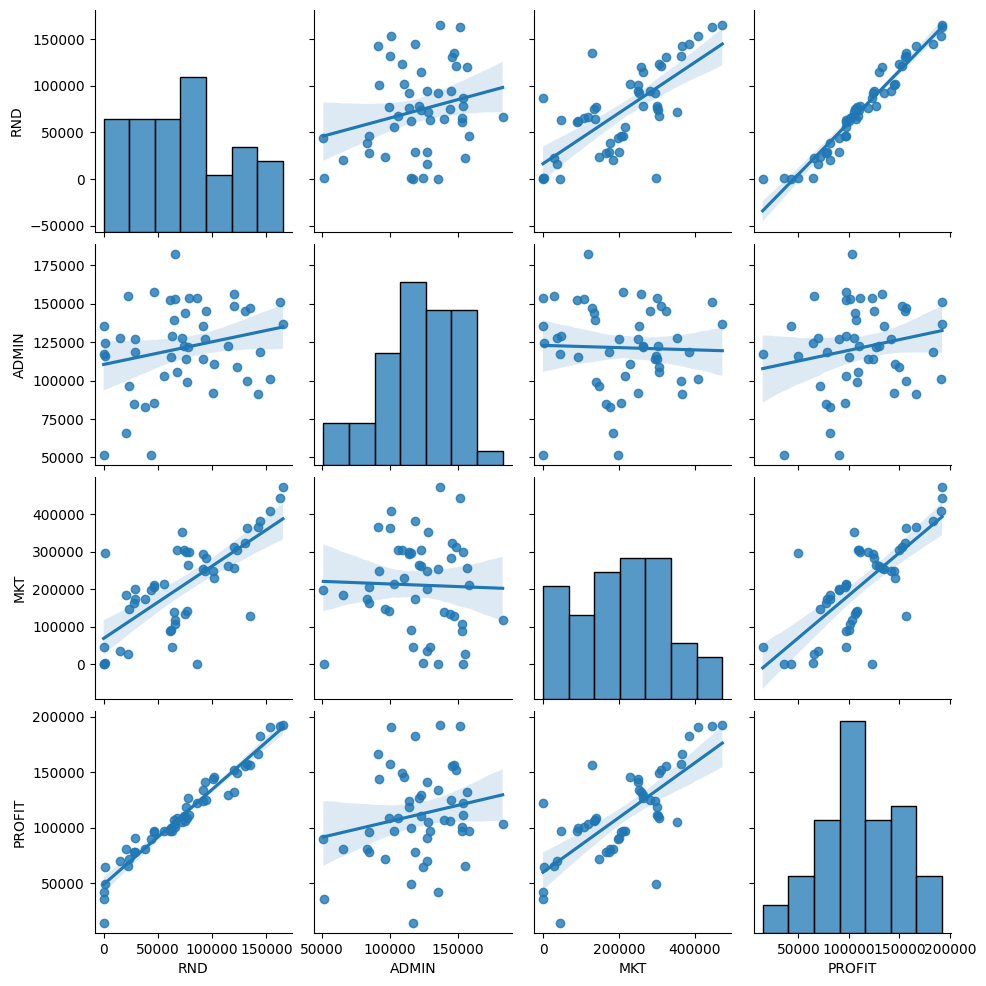

In [50]:

import seaborn as sns
sns.pairplot(df, kind="reg")